<a href="https://colab.research.google.com/github/anushka012/Time_Series_Prediction/blob/main/Time_Series_Prediction_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("//content/Sample_Individual_Pandas.xlsx")
df

,Year,Index,Location,Area (Ha),Rice (M Tonnes),Wheat (M Tonnes),Sugar (M Tonnes)
0,2010,0,Eastern,1,2402,2902,59910
1,2010,1,Eastern,1,2402,2902,59910
2,2010,2,Eastern,0,0,0,0
3,2010,3,Eastern,1,2402,2902,59910
4,2010,4,Eastern,1,2402,2902,59910
...,...,...,...,...,...,...,...
955,2021,15,Western,1,2353,3721,63226
956,2021,16,Western,2,4706,7442,126452
957,2021,17,Western,0,0,0,0
958,2021,18,Western,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

***Normalize the dataset***

In [ ]:
temp = df[df['Location'] == 'Eastern']['Rice (M Tonnes)'].copy()
temp

0      2402
1      2402
2         0
3      2402
4      2402
       ... 
235    2402
236    7206
237       0
238    4804
239    2402
Name: Rice (M Tonnes), Length: 240, dtype: int64

In [ ]:
obs = np.arange(1, len(temp) + 1, 1)

In [ ]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(np.array(temp).reshape(-1,1))

***Data Preprocessing***

In [ ]:
def vector_seq(sequences, dimension=10000):
    results = zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,0])
  Y.append(data_arr[d,0])
 return np.array(X), np.array(Y)

***Split dataset into test and training datasets***

In [ ]:
#Split data set into testing dataset and train dataset
train_size = 1000
train, test =df.values[0:train_size,:],df.values[train_size:len(df.values),:]
# setup look_back window 
look_back = 30
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

***Define neural network shape and compile model***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [ ]:
import tensorflow as tf

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
testX= tf.convert_to_tensor(testX)
testY= tf.convert_to_tensor(testY)

In [ ]:
trainX = np.asarray(trainX).astype(np.float32)
trainY = np.asarray(trainY).astype(np.float32)

***Fit Model***

In [ ]:
model= model_dnn(look_back)

history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, 
                  validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
31/31 [==============================] - 1s 3ms/step - loss: 28065.7148 - mse: 28065.7168 - mae: 129.4751
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 997.2719 - mse: 997.2719 - mae: 25.6700
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 64.4453 - mse: 64.4453 - mae: 6.6670
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 18.2798 - mse: 18.2798 - mae: 3.0617
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 15.5189 - mse: 15.5189 - mae: 2.8283
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 15.0772 - mse: 15.0772 - mae: 2.6351
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 18.2921 - mse: 18.2921 - mae: 3.0574
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 23.2280 - mse: 23.2280 - mae: 3.7198
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 29.8411 - mse: 29.8411 - mae: 4.5107

***Model evaluation***

In [ ]:
 def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model_loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ') 

Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f 


In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
import seaborn as sns

In [ ]:
def plot_time_series(timesteps, 
                     values, 
                     format=".", 
                     label = None):
  plt.plot(timesteps, 
           values, 
           format,
           label = label)
  plt.xlabel("Time")
  plt.ylabel("Stock Price")
  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

***Visualizing Prediction***

In [ ]:
def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:10], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:10], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Crops', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show()

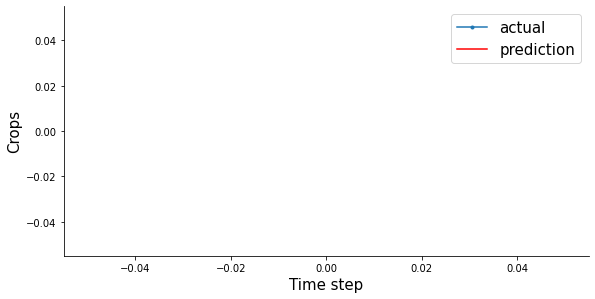

In [ ]:
prediction_plot(testY, testX)